<a href="https://colab.research.google.com/github/huwjjeong/-project/blob/main/%EC%A3%BC%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.2 MB/s eta 0:00:00


In [2]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 50.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [3]:
!pip install mplfinance

In [11]:
!pip install --upgrade mplfinance

In [18]:
!pip install --upgrade mplfinance

/tmp/ipython-input-51-629625964.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2024-01-01", end="2024-12-31", progress=False)


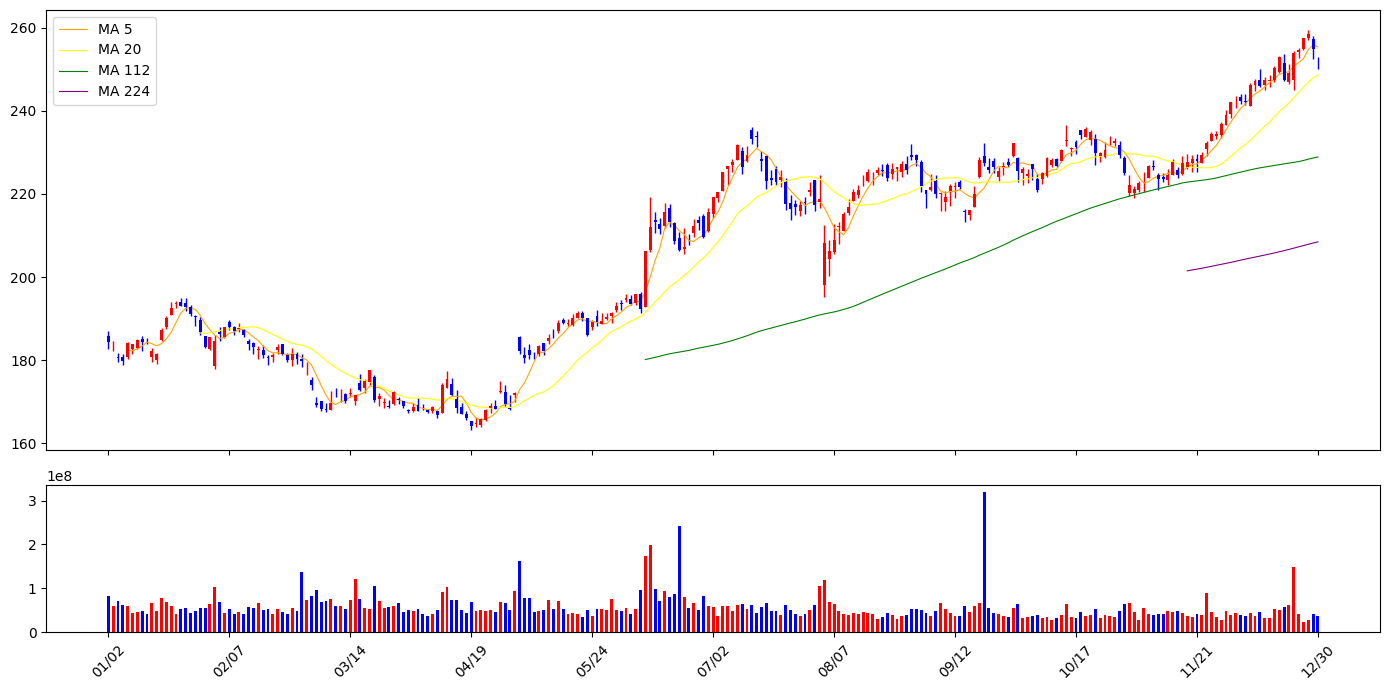

In [51]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# ── 1. 데이터 다운로드 및 전처리 ──
df = yf.download("AAPL", start="2024-01-01", end="2024-12-31", progress=False)
df = df.xs('AAPL', axis=1, level=1)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
df.dropna(inplace=True)
df = df.astype(float)
df.reset_index(inplace=True)

# ── 2. 색상 분류 (양봉: red, 음봉: blue) ──
df['Color'] = ['red' if c >= o else 'blue' for c, o in zip(df['Close'], df['Open'])]

# ── 3. 인덱스 생성 (등간격용) ──
df['Index'] = range(len(df))

# 이동평균선 계산 (5일, 20일, 112일, 224일)
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA112'] = df['Close'].rolling(window=112).mean()
df['MA224'] = df['Close'].rolling(window=224).mean()

# ── 4. 그래프 그리기 ──
fig, (ax_candle, ax_vol) = plt.subplots(2, 1, figsize=(14, 7), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
bar_width = 0.6

# 캔들차트
for _, row in df.iterrows():
    x = row['Index']
    o, c, h, l = row['Open'], row['Close'], row['High'], row['Low']
    color = row['Color']
    ax_candle.bar(x, abs(c - o), bottom=min(c, o), color=color, width=bar_width, align='center', zorder=3)
    ax_candle.vlines(x, l, h, color=color, linewidth=1, zorder=2)

# ── 이동평균선 그리기 ──
ax_candle.plot(df['Index'], df['MA5'], label='MA 5', color='orange', linewidth=0.8)
ax_candle.plot(df['Index'], df['MA20'], label='MA 20', color='yellow', linewidth=0.8)
ax_candle.plot(df['Index'], df['MA112'], label='MA 112', color='green', linewidth=0.8)
ax_candle.plot(df['Index'], df['MA224'], label='MA 224', color='purple', linewidth=0.8)
ax_candle.legend(loc='upper left')

# 거래량
ax_vol.bar(df['Index'], df['Volume'], color=df['Color'], width=bar_width, align='center', zorder=1)

# x축 라벨
tick_spacing = len(df) // 10
ax_vol.set_xticks(df['Index'][::tick_spacing])
ax_vol.set_xticklabels(df['Date'].dt.strftime('%m/%d')[::tick_spacing], rotation=45)

plt.tight_layout()
plt.show()
